In [316]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [317]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,70.0,0,2695,1,40,0,241000.0,1.0,137,1,0,247,0
1,45.0,1,66,1,25,0,233000.0,0.8,135,1,0,230,0
2,75.0,1,203,1,38,1,283000.0,0.6,131,1,1,74,0
3,70.0,0,81,1,35,1,533000.0,1.3,139,0,0,212,0
4,62.0,0,30,1,60,1,244000.0,0.9,139,1,0,117,0


In [318]:
col = df.columns
col

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [319]:
df.corr()['DEATH_EVENT'].sort_values()

time                       -0.511276
ejection_fraction          -0.302391
serum_sodium               -0.186342
platelets                  -0.044250
smoking                    -0.014120
sex                         0.000607
diabetes                    0.004943
high_blood_pressure         0.040363
creatinine_phosphokinase    0.072448
anaemia                     0.075700
age                         0.247136
serum_creatinine            0.281244
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

In [320]:
# for i in df.columns:
#   plt.figure(figsize=(8,8))
#   sns.boxenplot(x = df['DEATH_EVENT'],y=df[i])
#   sns.stripplot(x = df['DEATH_EVENT'],y=df[i],color='BLACK')
#   plt.show

<Axes: xlabel='time', ylabel='age'>

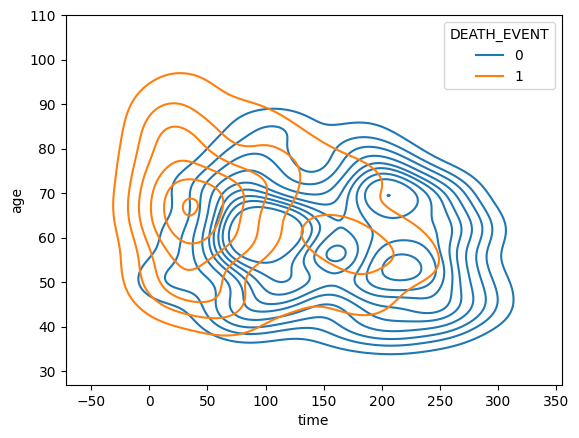

In [321]:
sns.kdeplot(x=df['time'],y=df['age'],hue=df['DEATH_EVENT'])

In [322]:
x = df.drop(['DEATH_EVENT'],axis=1)
y = df['DEATH_EVENT']

In [323]:
# res = df.sample(n=100)

In [324]:
# df = pd.concat([df,res])

In [347]:
# df.shape

(798, 13)

In [326]:
# df = df.sample(n=len(df)-50).sort_index()

In [327]:
# df

In [328]:
# df = df.sample(frac = 1)

In [329]:
# df.to_csv("heart_failure_clinical_records_dataset.csv",index=False)

In [330]:
col = ['age',	'anaemia',	'creatinine_phosphokinase',	'diabetes',	'ejection_fraction',	'high_blood_pressure',	'platelets',	'serum_creatinine',	'serum_sodium',	'sex',	'smoking',	'time'	]

In [331]:
from sklearn.preprocessing import StandardScaler

In [332]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x,columns=col)

In [333]:
from joblib import dump
dump(scaler, 'std_scaler.bin', compress=True)

['std_scaler.bin']

In [334]:
from sklearn.model_selection import train_test_split

In [335]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)

In [336]:
from keras import callbacks
from keras import Sequential
from keras.layers import Dense, Dropout
# from keras.optimizers import SGD

In [337]:
earlystopping = callbacks.EarlyStopping(
    min_delta =0.0001, patience = 20, restore_best_weights=True
)

In [338]:
model = Sequential()

In [339]:
model.add(Dense(units=256,kernel_initializer='uniform',activation='relu',input_dim=12))
model.add(Dense(units=128,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=64,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=32,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))


In [340]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [341]:
history = model.fit(x_train,y_train,batch_size=32,epochs=500,callbacks=[earlystopping],validation_split=0.2)

Epoch 1/500
15/15 [==============================] - 3s 30ms/step - loss: 0.6901 - accuracy: 0.6904 - val_loss: 0.6841 - val_accuracy: 0.7000
Epoch 2/500
15/15 [==============================] - 0s 8ms/step - loss: 0.6515 - accuracy: 0.7238 - val_loss: 0.5799 - val_accuracy: 0.7000
Epoch 3/500
15/15 [==============================] - 0s 9ms/step - loss: 0.4709 - accuracy: 0.7238 - val_loss: 0.4939 - val_accuracy: 0.7000
Epoch 4/500
15/15 [==============================] - 0s 9ms/step - loss: 0.4017 - accuracy: 0.7238 - val_loss: 0.4572 - val_accuracy: 0.7000
Epoch 5/500
15/15 [==============================] - 0s 8ms/step - loss: 0.3875 - accuracy: 0.7531 - val_loss: 0.4730 - val_accuracy: 0.7833
Epoch 6/500
15/15 [==============================] - 0s 8ms/step - loss: 0.3488 - accuracy: 0.8452 - val_loss: 0.4387 - val_accuracy: 0.7833
Epoch 7/500
15/15 [==============================] - 0s 8ms/step - loss: 0.3166 - accuracy: 0.8849 - val_loss: 0.4436 - val_accuracy: 0.7667
Epoch 8/500


In [342]:
val_accuracy = np.mean(history.history['val_accuracy'])
print(val_accuracy*100)

80.03205152658316


In [343]:
y_pred = model.predict(x_test)
y_pred = (y_pred>0.5)

7/7 [==============================] - 0s 3ms/step


In [344]:
eval = model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.3635 - accuracy: 0.8750


In [345]:
print("Accuracy: ",round(eval[1],2))

Accuracy:  0.88


In [346]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model.h5")